In [1]:
from matplotlib import pyplot as plt
import matplotlib.offsetbox as offsetbox
import numpy as np
import h5py
import mplcursors

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.models import Model

import umap
from sklearn.manifold import TSNE

from utils import *

import cv2
import random

C:\Users\MaryBeth\anaconda3\envs\latent\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = h5py.File('3dshapes.h5', 'r')
print(dataset.keys())
images = dataset['images']  # array shape [480000,64,64,3], uint8 in range(256)
labels = dataset['labels']  # array shape [480000,6], float64
image_shape = images.shape[1:]  # [64,64,3]
label_shape = labels.shape[1:]  # [6]
n_samples = labels.shape[0]  # 10*10*10*8*4*15=480000

<KeysViewHDF5 ['images', 'labels']>


image:  355223


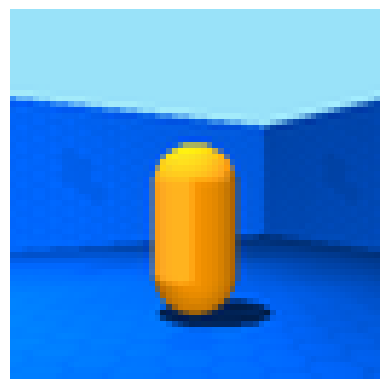

In [3]:
import random
random_number = random.randint(0, 480000)
print("image: ", random_number)
plt.axis('off')
plt.imshow(images[317385])

In [4]:
img = images[317385]

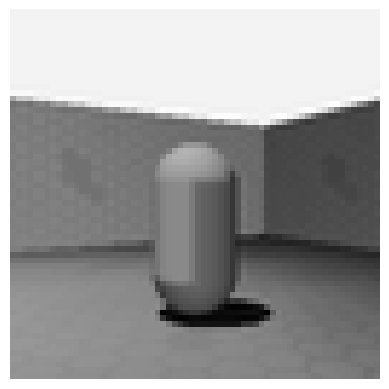

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray_image, cmap='gray')

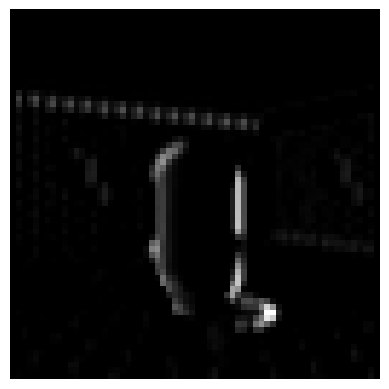

In [7]:
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

vertical_edges = cv2.filter2D(gray_image, -1, sobel_vertical)

plt.axis('off')
plt.imshow(vertical_edges, cmap='gray')

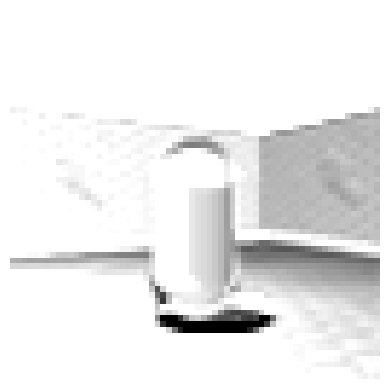

In [8]:
sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, 1]])

horizontal_edges = cv2.filter2D(gray_image, -1, sobel_horizontal)

plt.axis('off')
plt.imshow(horizontal_edges, cmap='gray')

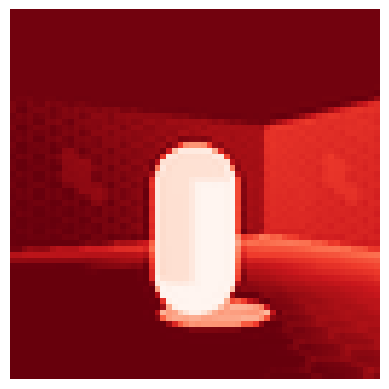

In [9]:
blue,green,red = cv2.split(img)
plt.axis('off')
plt.imshow(red, cmap = 'Reds')

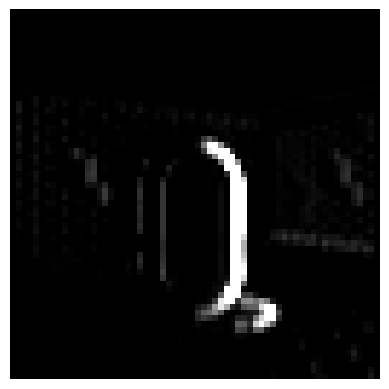

In [10]:
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

vertical_edges = cv2.filter2D(red, -1, sobel_vertical)

plt.axis('off')
plt.imshow(vertical_edges, cmap='gray')

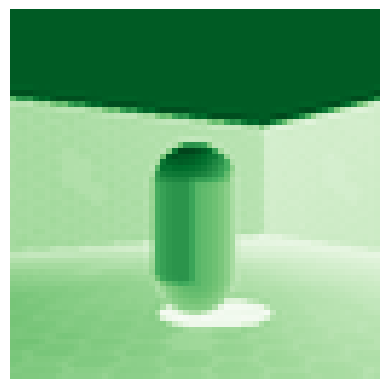

In [11]:
blue,green,red = cv2.split(img)
plt.axis('off')
plt.imshow(green, cmap = 'Greens')

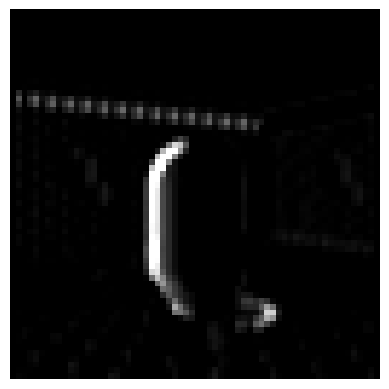

In [12]:
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

vertical_edges = cv2.filter2D(green, -1, sobel_vertical)

plt.axis('off')
plt.imshow(vertical_edges, cmap='gray')

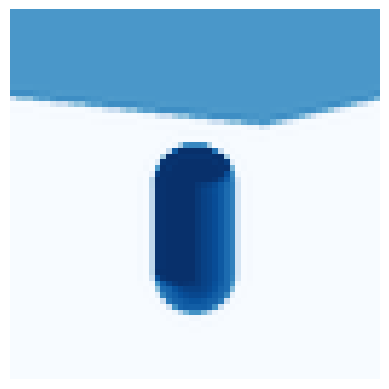

In [13]:
blue,green,red = cv2.split(img)
plt.axis('off')
plt.imshow(blue, cmap = 'Blues')

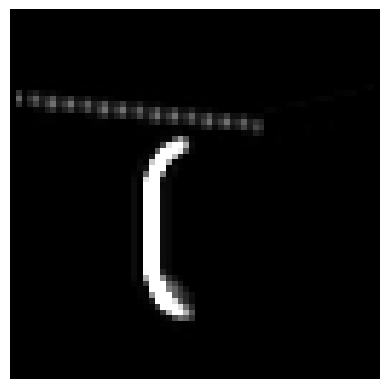

In [14]:
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

vertical_edges = cv2.filter2D(blue, -1, sobel_vertical)

plt.axis('off')
plt.imshow(vertical_edges, cmap='gray')

# Feature Maps

Number of layers in the model: 175
conv1_conv
1/1 [==============================] - 0s 86ms/step


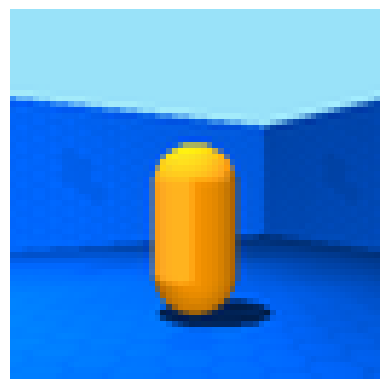

In [5]:
image = img_to_array(img)
image = preprocess_input(image)
img_array_expanded = np.expand_dims(image, axis=0)

model = ResNet50(weights='imagenet', include_top=False)

num_layers = len(model.layers)
print("Number of layers in the model:", num_layers)

layer = model.get_layer(index=2)
layer_name = layer.name
print(layer_name)
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

feature_maps = intermediate_layer_model.predict(img_array_expanded)

plt.axis('off')
plt.imshow(img)

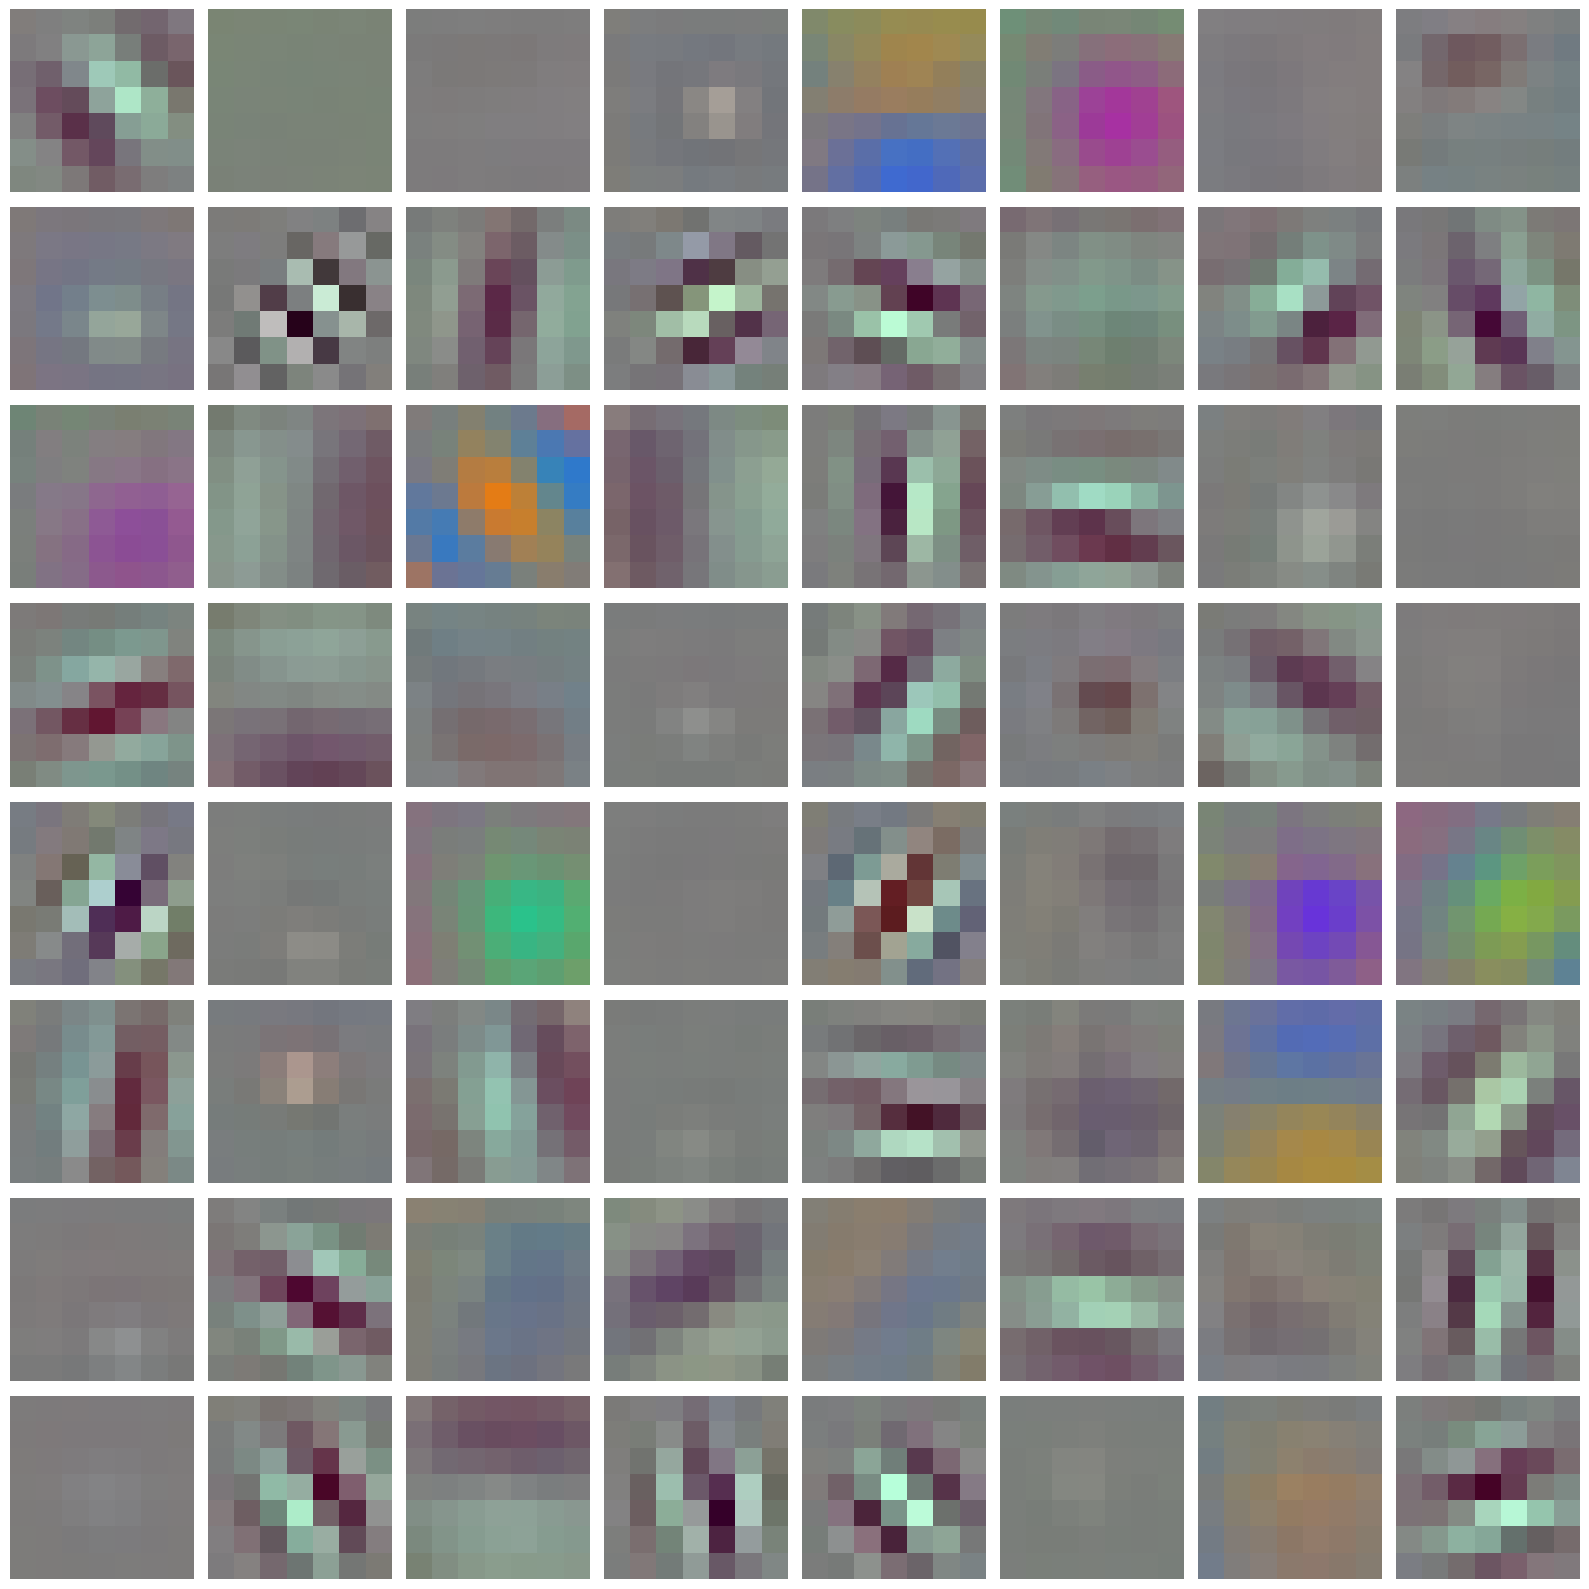

In [24]:
filters, biases = intermediate_layer_model.get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

num_filters = filters.shape[-1]

n_cols = 8
n_rows = min(num_filters // n_cols, 8)

plt.figure(figsize=(n_cols * 2, n_rows * 2))

for i in range(n_rows * n_cols):
    if i < num_filters:
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(filters[:, :, :, i], cmap='viridis')
        plt.axis('off')

plt.tight_layout()
plt.show()

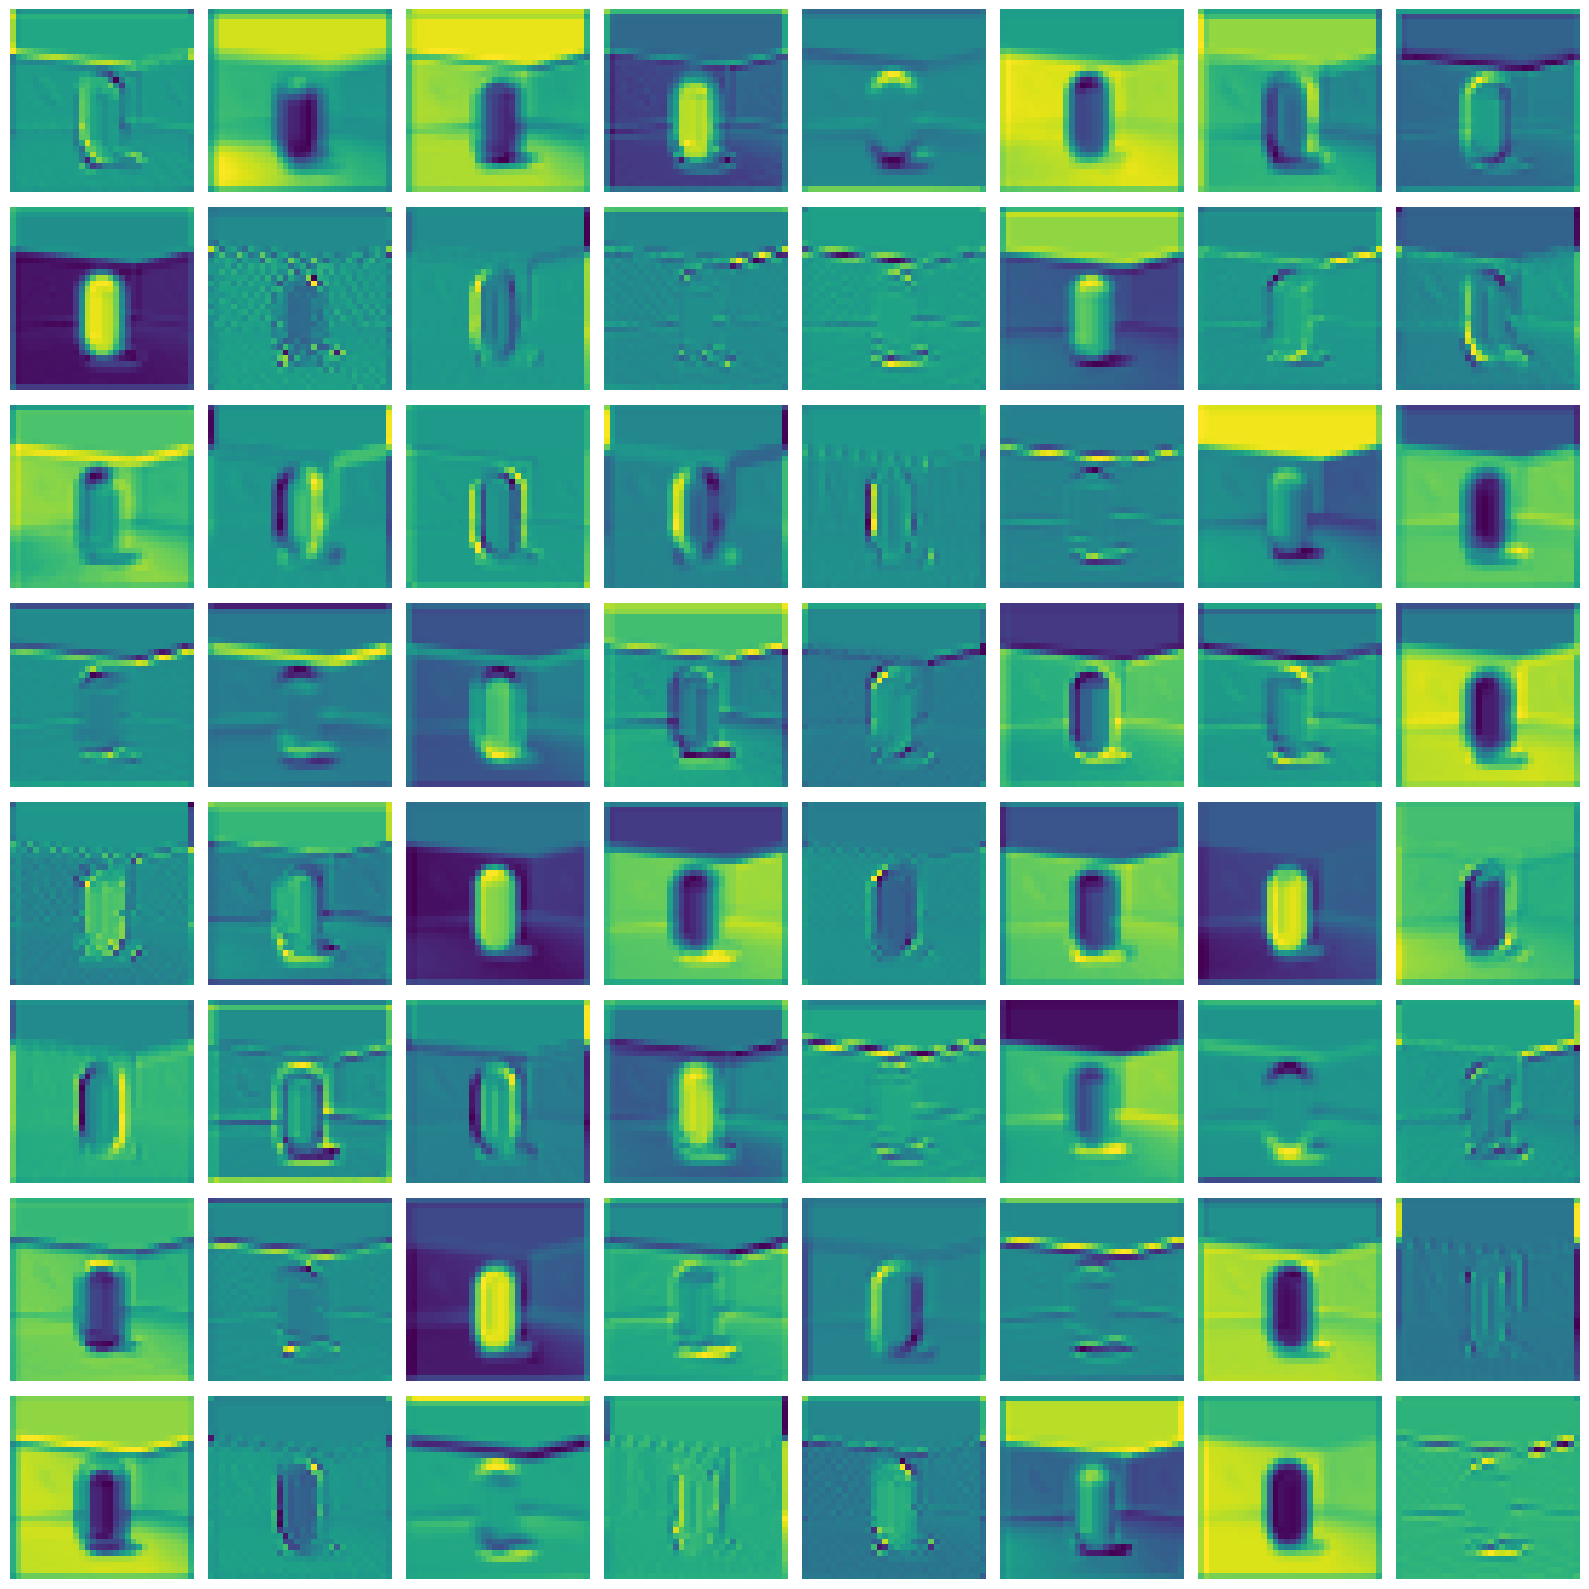

In [6]:
num_features = feature_maps.shape[-1]  
size = feature_maps.shape[1]  

n_cols = 8
n_rows = min(num_features // n_cols, 8)

plt.figure(figsize=(n_cols * 2, n_rows * 2))

for i in range(n_rows * n_cols):
    if i < num_features:
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')

plt.tight_layout()
plt.show()